                                     WINTER SEM 2020
                                  CSE 4020 MACHINE LEARNING 
                                    Digital Assignment-1
                                
                                   Saurav Rauniyar (18BCE2482)


In [1]:
import pandas as pd 

In [2]:
#reading the dataset
trek= pd.read_csv("trek.csv",sep=",",encoding='cp1256')

# People tend to go for trekking without considering the fact that whether it is suitable for them to go or not. Recently there were news regarding the tourist getting lost during trekking. So, this ML model is built for the safety of the tourist and whether it is good to go for trekking based on the important features that has been mentioned in the dataset, this will give them an insight of of whether it is good to go for the particular place for trekking.

## here the dataset predicts either it is good to go for trekking or not based on the on the predictor variables.

## references : https://www.kimkim.com/c/the-10-best-classic-treks-in-nepal

In [3]:
#peek at the dataset
trek.head()

,Trek Place,Max Duration,Trek Style,Trip Cost,Difficulty,Group (>=5),Good to Go
0,Everest Three Passes Trek,36,Teahouse,100K,Challenging,Yes,Yes
1,Manaslu Circuit Trek,26,Teahouse,110K,Challenging,Yes,No
2,Langtang Trek,14,Teahouse,96K,Moderate,No,Yes
3,Annapurna Base Camp,24,Teahouse,140K,Moderate,Yes,No
4,Upper Mustang Trek,24,Teahouse,120K,Moderate,Yes,Yes


In [4]:
#Work with X (Predictor Variables)
X_features = list(trek.columns)
X_features.remove('Good to Go')
X_features

['Trek Place',
 'Max Duration',
 'Trek Style',
 'Trip Cost',
 'Difficulty',
 'Group (>=5)']

In [5]:
#target variables
Y_features = trek['Good to Go']

In [6]:
#Encode the Categorical Varisbles
encode_trek_df = pd.get_dummies(trek[X_features])

In [7]:
encode_trek_df.head()

,Max Duration,Trek Place_Annapurna Base Camp,Trek Place_Annapurna Circuit Trek,Trek Place_Dhaulagiri Circuit Trek,Trek Place_Everest Base Camp Trek,Trek Place_Everest Three Passes Trek,Trek Place_Gokyo Lake Trek,Trek Place_Langtang Trek,Trek Place_Manaslu Circuit Trek,Trek Place_Nar Phu Valley Trek,...,Trip Cost_140K,Trip Cost_60K,Trip Cost_70K,Trip Cost_80K,Trip Cost_96K,Difficulty_Challenging,Difficulty_Moderate,Difficulty_Very Challenging,Group (>=5)_No,Group (>=5)_Yes
0,36,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,26,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,14,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
3,24,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
4,24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [8]:
#set the X and Y
X = encode_trek_df
Y = trek['Good to Go']#.map(lambda x: int(x == 'Yes'))

In [9]:
Y

0    Yes 
1     No 
2    Yes 
3     No 
4    Yes 
5     No 
6    Yes 
7     No 
8    Yes 
9    Yes 
Name: Good to Go, dtype: object

In [10]:
#Split the Dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 10)

In [11]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((7, 26), (3, 26), (7,), (3,))

In [12]:
#Build the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
clf_tree = DecisionTreeClassifier(criterion = "gini", max_depth = 3)

In [13]:
clf_tree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=3)

In [14]:
Y_pred = clf_tree.predict(X_test)

In [15]:
# Accuracy Score
clf_tree.score(X_test, Y_test)

0.6666666666666666

[Text(200.88000000000002, 181.2, 'X[15] <= 0.5\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(133.92000000000002, 108.72, 'X[0] <= 27.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(66.96000000000001, 36.23999999999998, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(200.88000000000002, 36.23999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

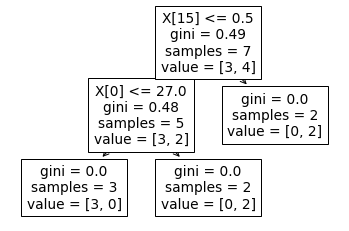

In [18]:
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt 
from sklearn import tree 
tree.plot_tree(clf_tree)

In [17]:
#Visualizing the tree

#pip install graphviz
#pip install pydotplus
#pip install IPython

from sklearn.tree import export_graphviz

#Export the tree into odt file ; odt is Text File
export_graphviz(clf_tree, out_file = 'dtree.odt', feature_names = X_train.columns, filled = True)

import pydotplus as pdot 
import IPython.display as Image

#read and create the image file 
dtree_graph = pdot.graphviz.graph_from_dot_file('dtree.odt')
#dtree_graph.write_graph('dtree.png')